In [1]:
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from keras.models import Sequential,Model
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D

%matplotlib inline

//home/anatoly/HDD/anaconda3/envs/ApplPythonCourseProj/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
//home/anatoly/HDD/anaconda3/envs/ApplPythonCourseProj/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
//home/anatoly/HDD/anaconda3/envs/ApplPythonCourseProj/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", n

In [2]:
df_train = pd.DataFrame(pd.read_pickle("train/train.pickle"))
df_test = pd.DataFrame(pd.read_pickle("test/test.pickle"))

In [3]:
df_train.head()

,features,label
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [4]:
def features_to_matrix(dataset):
    pixs = dataset['features'].apply(pd.Series)
    pixs = pixs.rename(columns = lambda x: 'pix_' + str(x))
    return pixs

In [5]:
x_train = features_to_matrix(df_train[:70000])
x_test = features_to_matrix(df_test)
x_train = pd.concat([x_train, features_to_matrix(df_train[70000:])], axis=0)
x_train.shape

(80432, 784)

In [6]:
y_test = df_test['label']
y_test = y_test.apply(pd.Series)
y_test = y_test.rename(columns = lambda x: 'class_' + str(x))

In [7]:
y_train = df_train['label']
y_train = y_train.apply(pd.Series)
y_train = y_train.rename(columns = lambda x: 'class_' + str(x))

In [8]:
x_reshaped = x_train.values.reshape((x_train.shape[0], 28, 28, 1))
x_test_reshaped = x_test.values.reshape(x_test.shape[0], 28, 28, 1)

In [86]:
hidden_size = 50
classes_num = y_train.shape[1]
classes_num

101

In [126]:
model = Sequential()
model.add(Conv2D(5, kernel_size=5, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(22, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(classes_num, activation='softmax'))

In [127]:
optimazer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [128]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [129]:
history = model.fit(x_reshaped, y_train, batch_size=128, validation_split=0.2, epochs=12)

Train on 64345 samples, validate on 16087 samples
Epoch 1/12
64345/64345 [==============================] - 31s 487us/step - loss: 1.3411 - acc: 0.6698 - val_loss: 0.7845 - val_acc: 0.7868
Epoch 2/12
64345/64345 [==============================] - 31s 481us/step - loss: 0.6957 - acc: 0.8114 - val_loss: 0.6594 - val_acc: 0.8187
Epoch 3/12
64345/64345 [==============================] - 31s 489us/step - loss: 0.5975 - acc: 0.8331 - val_loss: 0.6093 - val_acc: 0.8369
Epoch 4/12
64345/64345 [==============================] - 30s 467us/step - loss: 0.5416 - acc: 0.8472 - val_loss: 0.5272 - val_acc: 0.8506
Epoch 5/12
64345/64345 [==============================] - 28s 436us/step - loss: 0.5042 - acc: 0.8563 - val_loss: 0.5472 - val_acc: 0.8509
Epoch 6/12
64345/64345 [==============================] - 31s 487us/step - loss: 0.4774 - acc: 0.8632 - val_loss: 0.5240 - val_acc: 0.8523
Epoch 7/12
64345/64345 [==============================] - 29s 452us/step - loss: 0.4532 - acc: 0.8686 - val_loss: 0.

In [130]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

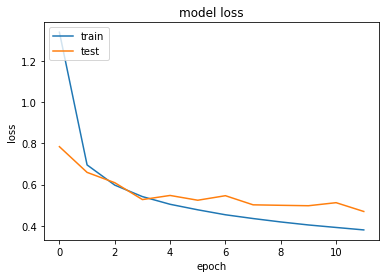

In [131]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

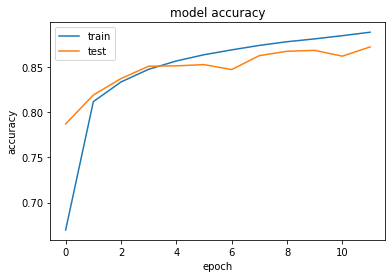

In [132]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [133]:
score, acc = model.evaluate(x_test_reshaped, y_test, batch_size=128)
score, acc

5555/5555 [==============================] - 1s 180us/step


(0.7523418292067912, 0.803420342087853)

In [117]:
score, acc = model.evaluate(x_test_reshaped, y_test, batch_size=128)
score, acc

5555/5555 [==============================] - 2s 296us/step


(0.726833278541625, 0.8066606661202562)

In [154]:
model = Sequential()
model.add(Conv2D(5, kernel_size=5, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(22, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(classes_num, activation='softmax'))

In [155]:
optimazer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [156]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [157]:
history = model.fit(x_reshaped, y_train, batch_size=128, epochs=13)

Epoch 1/13
80432/80432 [==============================] - 35s 434us/step - loss: 1.2546 - acc: 0.6895
Epoch 2/13
80432/80432 [==============================] - 34s 426us/step - loss: 0.6269 - acc: 0.8275
Epoch 3/13
80432/80432 [==============================] - 35s 432us/step - loss: 0.5331 - acc: 0.8499
Epoch 4/13
80432/80432 [==============================] - 35s 437us/step - loss: 0.4843 - acc: 0.8616
Epoch 5/13
80432/80432 [==============================] - 33s 411us/step - loss: 0.4521 - acc: 0.8704
Epoch 6/13
80432/80432 [==============================] - 35s 438us/step - loss: 0.4261 - acc: 0.8753
Epoch 7/13
80432/80432 [==============================] - 37s 458us/step - loss: 0.4068 - acc: 0.8807
Epoch 8/13
80432/80432 [==============================] - 36s 446us/step - loss: 0.3892 - acc: 0.8850
Epoch 9/13
80432/80432 [==============================] - 38s 471us/step - loss: 0.3714 - acc: 0.8898
Epoch 10/13
80432/80432 [==============================] - 32s 403us/step - loss: 

In [158]:
score, acc = model.evaluate(x_test_reshaped, y_test, batch_size=128)
score, acc

5555/5555 [==============================] - 2s 301us/step


(0.7526927416974848, 0.8019801981056413)

In [159]:
import pickle

with open('model.obj', 'wb') as f:
    pickle.dump(model, f)

In [161]:
with open('model.obj', 'rb') as f:
    saved_model = pickle.load(f)
    score, acc = model.evaluate(x_test_reshaped, y_test, batch_size=128)
score, acc

5555/5555 [==============================] - 1s 186us/step


(0.7526927416974848, 0.8019801981056413)